In [2]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, MeanShift
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from IPython.display import Markdown, display

In [3]:
df = pd.read_excel('adel.xlsx', sheet_name=1, index_col=0)

In [4]:
tsne = TSNE(n_components=6, method='exact')

In [5]:
reduced = tsne.fit_transform(df)

## DBSCAN

In [6]:
eps = 0.5

while True:
    labels = DBSCAN(eps=eps).fit_predict(reduced)
    if sum(labels == -1) <= 60:
        break
    
    eps += 0.1

print('eps =', eps)
print('labels =', np.unique(labels))
print('number of individual clusters =', sum(labels == -1))
print('silhouette score =', silhouette_score(reduced, labels))

table = 'Cluster|# Points\n---:|:---\n'
for i in range(len(np.unique(labels))):
    table += str(i-1) + '|'  # To account for -1
    table += str(sum(labels == i-1))
    table += '\n'

display(Markdown(table))

eps = 8.199999999999987
labels = [-1  0  1  2]
number of individual clusters = 56
silhouette score = -0.051228233


Cluster|# Points
---:|:---
-1|56
0|512
1|5
2|45


A Silhouette score of 0 indicates a worthless pursuit.

## Mean Shift

In [7]:
ms = MeanShift()
preds = ms.fit_predict(reduced)
print(np.unique(preds))

[0 1 2 3 4 5 6]


In [8]:
table = 'Cluster|# Points\n---:|:---\n'
for i in range(len(np.unique(preds))):
    table += str(i) + '|'
    table += str(sum(preds == i))
    table += '\n'

display(Markdown(table))

Cluster|# Points
---:|:---
0|611
1|1
2|1
3|1
4|2
5|1
6|1


## PCA and then DBSCAN

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=6)

In [11]:
reduced = pca.fit_transform(df)

In [12]:
eps = 0.5

while True:
    labels = DBSCAN(eps=eps).fit_predict(reduced)
    if sum(labels == -1) <= 60:
        break
    
    eps += 0.1

print('eps =', eps)
print('labels =', np.unique(labels))
print('number of individual clusters =', sum(labels == -1))
print('silhouette score =', silhouette_score(reduced, labels))

table = 'Cluster|# Points\n---:|:---\n'
for i in range(len(np.unique(labels))):
    table += str(i-1) + '|'  # To account for -1
    table += str(sum(labels == i-1))
    table += '\n'

display(Markdown(table))

eps = 139.49999999999636
labels = [-1  0  1  2  3]
number of individual clusters = 56
silhouette score = 0.5949854275548482


Cluster|# Points
---:|:---
-1|56
0|533
1|9
2|15
3|5


## Finding the best PCA value

In [14]:
scores = []

for i in range(1, 13):
    pca = PCA(n_components=i)
    reduced = pca.fit_transform(df)
    
    eps = 0.5

    while True:
        labels = DBSCAN(eps=eps).fit_predict(reduced)
        if sum(labels == -1) <= 60:
            break

        eps += 0.1
    
    score = silhouette_score(reduced, labels)
    scores.append(score)
    
    print('# dimensions =', i)
    print('silhouette score =', int(score * 1000) / 1000)
    print('==========================')

# dimensions = 1
silhouette score = 0.549
# dimensions = 2
silhouette score = 0.605
# dimensions = 3
silhouette score = 0.644
# dimensions = 4
silhouette score = 0.58
# dimensions = 5
silhouette score = 0.571
# dimensions = 6
silhouette score = 0.594
# dimensions = 7
silhouette score = 0.571
# dimensions = 8
silhouette score = 0.571
# dimensions = 9
silhouette score = 0.571
# dimensions = 10
silhouette score = 0.571
# dimensions = 11
silhouette score = 0.57
# dimensions = 12
silhouette score = 0.57


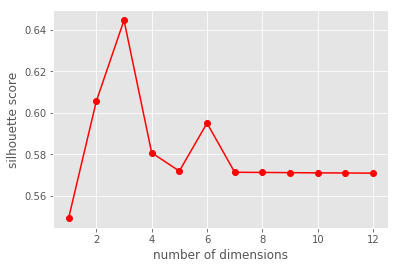

In [18]:
plt.style.use('ggplot')

plt.xlabel('number of dimensions')
plt.ylabel('silhouette score')
plt.plot(range(1, 13), scores, 'ro-');